<a href="https://colab.research.google.com/github/thasliya0404/class-activity/blob/main/casestudyon_PCAandModeling_thasliya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

breast_cancer = load_breast_cancer()
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [52]:
df.duplicated().sum()

np.int64(0)

In [53]:
df.isna().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [54]:
df.shape

(569, 31)

In [55]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [57]:
from sklearn.feature_selection import SelectKBest, f_classif

In [58]:
y=df['target']
x=df.drop(columns='target',axis=1)
x.shape

(569, 30)

array([[<Axes: title={'center': 'mean radius'}>,
        <Axes: title={'center': 'mean texture'}>,
        <Axes: title={'center': 'mean perimeter'}>,
        <Axes: title={'center': 'mean area'}>,
        <Axes: title={'center': 'mean smoothness'}>,
        <Axes: title={'center': 'mean compactness'}>],
       [<Axes: title={'center': 'mean concavity'}>,
        <Axes: title={'center': 'mean concave points'}>,
        <Axes: title={'center': 'mean symmetry'}>,
        <Axes: title={'center': 'mean fractal dimension'}>,
        <Axes: title={'center': 'radius error'}>,
        <Axes: title={'center': 'texture error'}>],
       [<Axes: title={'center': 'perimeter error'}>,
        <Axes: title={'center': 'area error'}>,
        <Axes: title={'center': 'smoothness error'}>,
        <Axes: title={'center': 'compactness error'}>,
        <Axes: title={'center': 'concavity error'}>,
        <Axes: title={'center': 'concave points error'}>],
       [<Axes: title={'center': 'symmetry error'}>

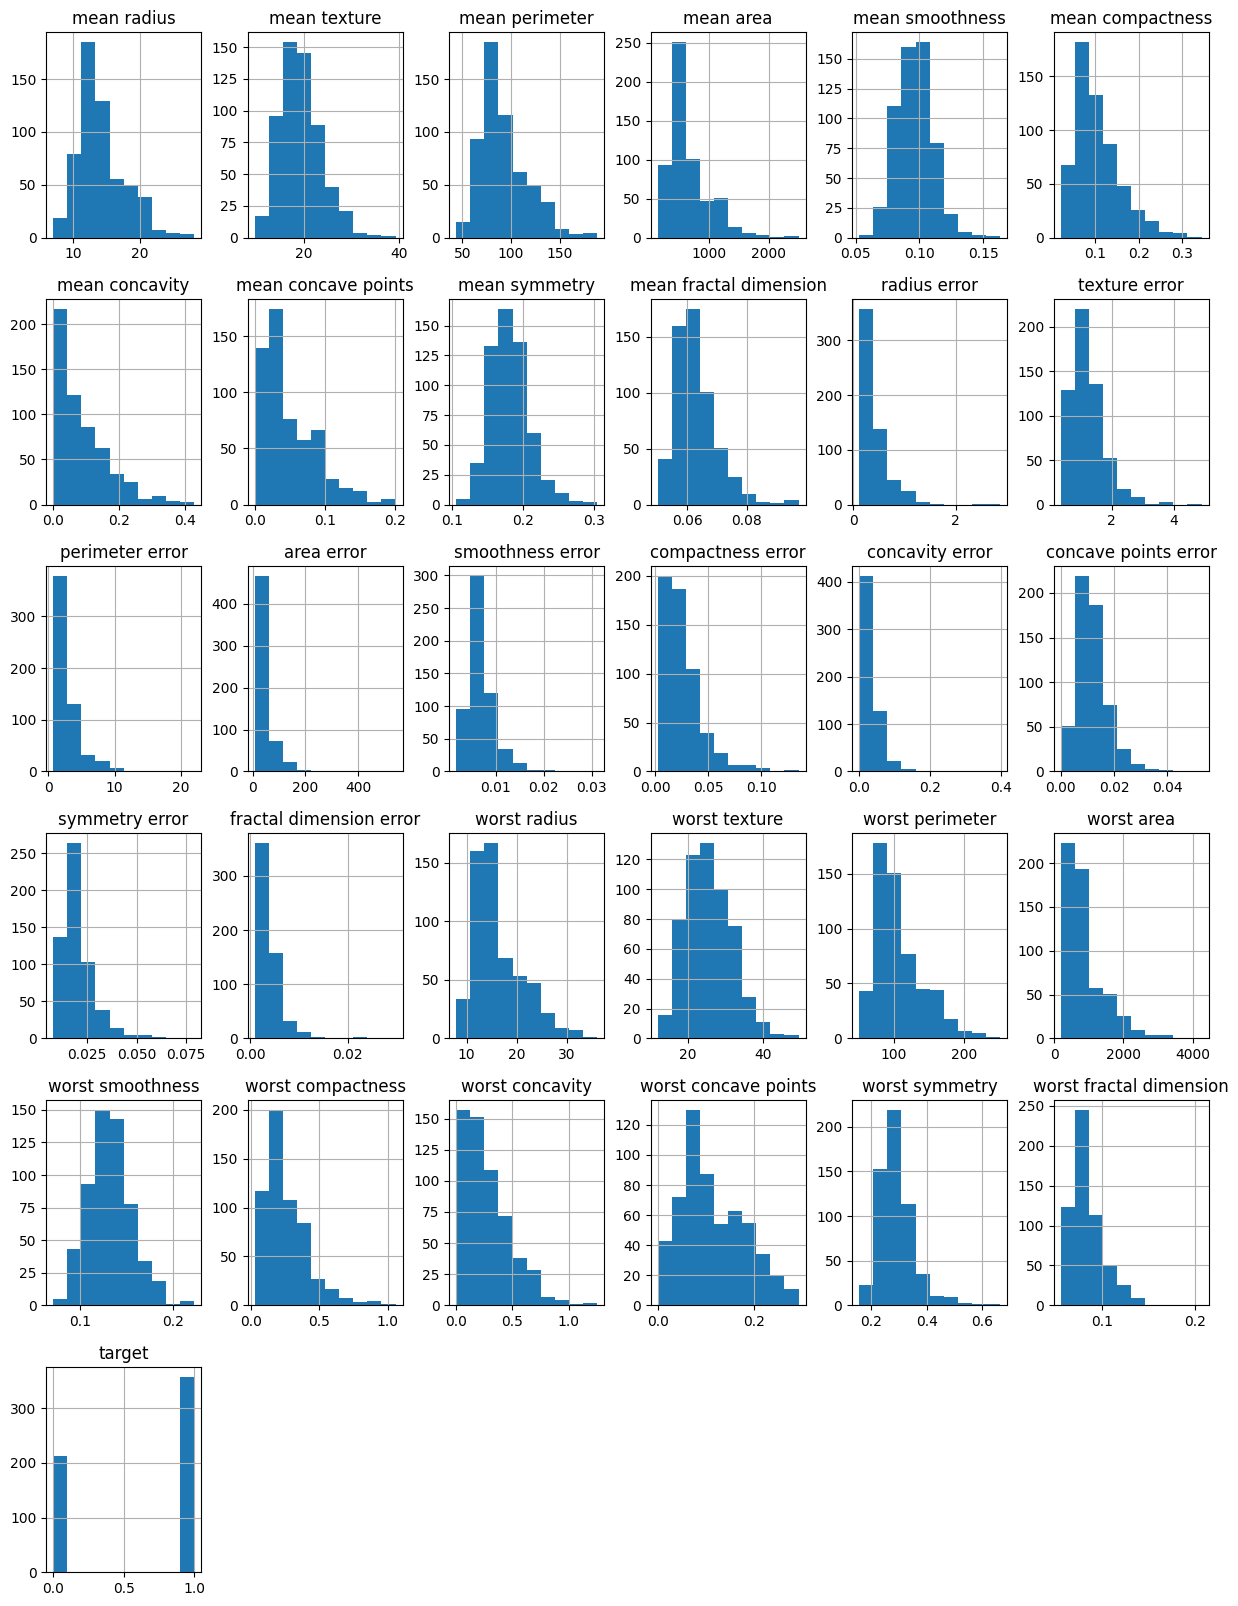

In [59]:
df.hist(figsize=(15,20))

In [60]:
selector_skbest=SelectKBest(score_func=f_classif,k=10)
x_new_BC=selector_skbest.fit_transform(x,y)
selected_feature_indices=selector_skbest.get_support(indices=True)
selected_features=x.columns[selected_feature_indices]
selected_features

Index(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'worst radius', 'worst perimeter', 'worst area',
       'worst concavity', 'worst concave points'],
      dtype='object')

In [61]:
x_new_BC.shape

(569, 10)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x_new_BC,y,random_state=42,test_size=.2)

In [64]:
min_scaled=MinMaxScaler()
x_train_scaled=min_scaled.fit_transform(x_train)
x_test_scaled=min_scaled.transform(x_test)

In [65]:
svc=SVC(kernel='linear')
svc.fit(x_train_scaled,y_train)
y_pred_svc=svc.predict(x_test_scaled)
print(accuracy_score(y_test,y_pred_svc))

0.9473684210526315


In [66]:
from sklearn.feature_selection import VarianceThreshold

In [67]:
selector_var=VarianceThreshold(threshold=0.5)
x_new_BC_var=selector_var.fit_transform(x)
x_new_BC_var.shape

(569, 10)

In [68]:
selected_feature_indices=selector_var.get_support(indices=True)
selected_features=x.columns[selected_feature_indices]
selector_var.get_feature_names_out()

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'perimeter error', 'area error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area'], dtype=object)

In [69]:
x.var()

,0
mean radius,12.418920
mean texture,18.498909
mean perimeter,590.440480
mean area,123843.554318
mean smoothness,0.000198
mean compactness,0.002789
mean concavity,0.006355
mean concave points,0.001506
mean symmetry,0.000752
mean fractal dimension,0.000050


In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
x,y=load_breast_cancer(return_X_y=True)
x.shape

(569, 30)

In [71]:
estimator=RandomForestClassifier(n_estimators=50,random_state=42)
selected_rfe=RFE(estimator=estimator,n_features_to_select=5,step=1)

In [72]:
selected_rfe=selected_rfe.fit(x,y)
print(selected_rfe.ranking_)

[11  8  9  2 15 16  3  1 24 26 14 22 12  6 18 21 19 23 20 25  1  4  1  1
  7 10  5  1 13 17]


In [73]:
selected_rfe.get_feature_names_out()

array(['x7', 'x20', 'x22', 'x23', 'x27'], dtype=object)

In [74]:
selected_features_rfe=selected_rfe.get_support(indices=True)
feature_names=load_breast_cancer().feature_names
selected_feature_names=[feature_names[i] for i in selected_features_rfe]
print(feature_names)
print(selected_feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[np.str_('mean concave points'), np.str_('worst radius'), np.str_('worst perimeter'), np.str_('worst area'), np.str_('worst concave points')]


In [75]:
x_rfe=selected_rfe.transform(x)
x_rfe.shape

(569, 5)

In [76]:
selected_rfe.estimator_.feature_importances_

array([0.15821333, 0.20345032, 0.25580968, 0.11961619, 0.26291048])

In [77]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [78]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [79]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_scaled)
pca_columns = [f'PC{i+1}' for i in range(pca.n_components_)]
pca_df=pd.DataFrame(data=x_pca,columns=pca_columns)
pca_df['target']=y
display(pca_df.head())

,PC1,PC2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0


In [80]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [81]:
import numpy as np

In [82]:
pca_full=PCA().fit(x_scaled)
print(pca_full.explained_variance_ratio_)
cum_var=np.cumsum(pca_full.explained_variance_ratio_)

[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]


In [83]:
cum_var

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

In [84]:
import matplotlib.pyplot as plt

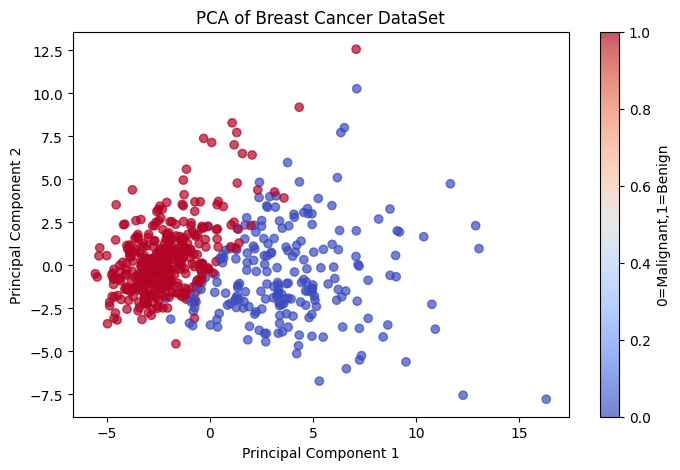

In [85]:
plt.figure(figsize=(8,5))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y,cmap='coolwarm',alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Breast Cancer DataSet')
plt.colorbar(label='0=Malignant,1=Benign')
plt.show()

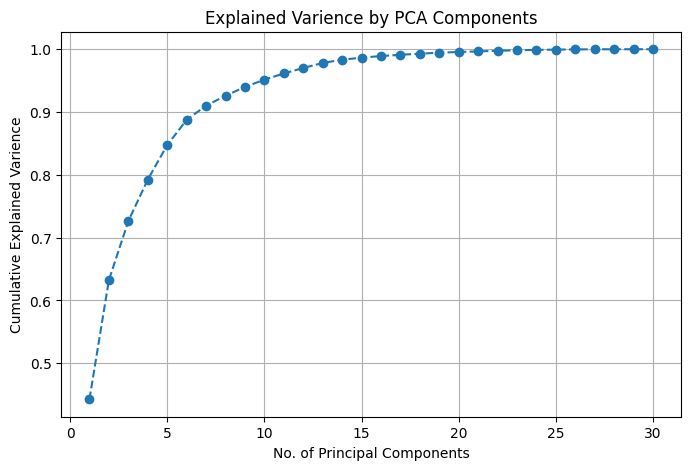

In [86]:
plt.figure(figsize=(8,5))
plt.plot(range(1,len(pca_full.explained_variance_ratio_)+1),pca_full.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.xlabel('No. of Principal Components')
plt.ylabel('Cumulative Explained Varience')
plt.title('Explained Varience by PCA Components')
plt.grid()
plt.show()